In [2]:
from pathlib import Path
import pandas as pd

import seaborn as sns
import numpy as np

from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [3]:
DATA_PATH = Path("data\SRP120552.tsv").absolute()
METADATA_PATH = Path("data\metadata_SRP120552.tsv").absolute()

In [4]:
counts = pd.read_csv(DATA_PATH, sep="\t")

In [5]:
counts

Gene  SRR6191750  SRR6191751  SRR6191752  SRR6191753  \
0      ENSG00000000003   56.629600  210.765150    0.000000   15.582642   
1      ENSG00000000005    0.000000    0.000000    0.000000    0.000000   
2      ENSG00000000419   52.532257  181.474520  250.384250   61.192110   
3      ENSG00000000457    6.420248    9.038753    6.449249    0.896064   
4      ENSG00000000460    0.000000   27.647682    0.000000  140.431730   
...                ...         ...         ...         ...         ...   
43358  ENSG00000286268    0.000000    0.000000    0.000000    0.000000   
43359  ENSG00000286269    3.012283    6.357253    0.000000    2.920779   
43360  ENSG00000286270    0.000000    0.000000    0.000000    0.000000   
43361  ENSG00000286271    0.000000    0.000000    0.000000    0.000000   
43362  ENSG00000286272    0.000000    0.000000    0.000000    0.000000   

       SRR6191754  SRR6191755  SRR6191756  SRR6191757  SRR6191758  ...  \
0        0.000000    3.951188    1.013635   10.157310   12.500870  ...   
1        0.000000    0.000000    0.000000    0.000000    0.000000  ...   
2        0.854224   29.988983   32.392227   43.866116   34.768540  ...   
3        9.391796    1.694619    1.771045    0.890477   15.431188  ...   
4        0.000000   15.594472   10.486232    1.409931   43.129833  ...   
...           ...         ...         ...         ...         ...  ...   
43358    0.000000    2.140921    0.000000    0.000000    0.000000  ...   
43359   12.417953    2.216796    3.025142    2.377553    2.266806  ...   
43360    0.000000    0.000000    0.000000    0.000000    0.000000  ...   
43361    0.000000    0.000000    0.000000    0.000000    0.000000  ...   
43362    0.000000    0.000000    0.000000    0.000000    0.000000  ...   

       SRR6192398  SRR6192399  SRR6192400  SRR6192401  SRR6192402  SRR6192403  \
0      143.910830  122.749306    0.000000  122.250435   94.166710  147.495970   
1        0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
2        0.000000  117.458120    0.000000    9.408690   56.129097  112.473976   
3        0.756136    0.789532    2.880358    3.794541    3.027338    0.790558   
4        0.000000    0.000000    0.000000    0.000000    3.229686    0.000000   
...           ...         ...         ...         ...         ...         ...   
43358    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
43359    1.006215    0.000000    0.835804    1.811789    4.883857    1.861232   
43360    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
43361    0.000000    0.000000    0.000000    0.806760    0.000000    0.000000   
43362    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   

       SRR6192404  SRR6192405  SRR6192406  SRR6192407  
0        0.000000  369.399140    0.000000    2.995046  
1        0.000000    0.000000    0.000000    0.000000  
2        7.008246    0.000000  248.942280    0.000000  
3        3.477984    2.319273    2.393112  236.096450  
4        0.000000    0.000000    0.000000    0.000000  
...           ...         ...         ...         ...  
43358    0.000000    0.000000    0.000000    0.000000  
43359    6.817812    0.000000    0.000000    0.000000  
43360    0.000000    0.000000    0.000000    0.000000  
43361    0.000000    0.000000    0.000000    0.000000  
43362    0.000000    0.000000    0.000000    0.876892  

[43363 rows x 657 columns]

In [6]:
counts = counts.set_index("Gene")

In [7]:
counts

SRR6191750  SRR6191751  SRR6191752  SRR6191753  SRR6191754  \
Gene                                                                          
ENSG00000000003   56.629600  210.765150    0.000000   15.582642    0.000000   
ENSG00000000005    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000000419   52.532257  181.474520  250.384250   61.192110    0.854224   
ENSG00000000457    6.420248    9.038753    6.449249    0.896064    9.391796   
ENSG00000000460    0.000000   27.647682    0.000000  140.431730    0.000000   
...                     ...         ...         ...         ...         ...   
ENSG00000286268    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286269    3.012283    6.357253    0.000000    2.920779   12.417953   
ENSG00000286270    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286271    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286272    0.000000    0.000000    0.000000    0.000000    0.000000   

                 SRR6191755  SRR6191756  SRR6191757  SRR6191758  SRR6191759  \
Gene                                                                          
ENSG00000000003    3.951188    1.013635   10.157310   12.500870    1.535458   
ENSG00000000005    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000000419   29.988983   32.392227   43.866116   34.768540   10.885117   
ENSG00000000457    1.694619    1.771045    0.890477   15.431188    6.612335   
ENSG00000000460   15.594472   10.486232    1.409931   43.129833    3.073701   
...                     ...         ...         ...         ...         ...   
ENSG00000286268    2.140921    0.000000    0.000000    0.000000    1.921149   
ENSG00000286269    2.216796    3.025142    2.377553    2.266806    0.000000   
ENSG00000286270    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286271    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286272    0.000000    0.000000    0.000000    0.000000    0.000000   

                 ...  SRR6192398  SRR6192399  SRR6192400  SRR6192401  \
Gene             ...                                                   
ENSG00000000003  ...  143.910830  122.749306    0.000000  122.250435   
ENSG00000000005  ...    0.000000    0.000000    0.000000    0.000000   
ENSG00000000419  ...    0.000000  117.458120    0.000000    9.408690   
ENSG00000000457  ...    0.756136    0.789532    2.880358    3.794541   
ENSG00000000460  ...    0.000000    0.000000    0.000000    0.000000   
...              ...         ...         ...         ...         ...   
ENSG00000286268  ...    0.000000    0.000000    0.000000    0.000000   
ENSG00000286269  ...    1.006215    0.000000    0.835804    1.811789   
ENSG00000286270  ...    0.000000    0.000000    0.000000    0.000000   
ENSG00000286271  ...    0.000000    0.000000    0.000000    0.806760   
ENSG00000286272  ...    0.000000    0.000000    0.000000    0.000000   

                 SRR6192402  SRR6192403  SRR6192404  SRR6192405  SRR6192406  \
Gene                                                                          
ENSG00000000003   94.166710  147.495970    0.000000  369.399140    0.000000   
ENSG00000000005    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000000419   56.129097  112.473976    7.008246    0.000000  248.942280   
ENSG00000000457    3.027338    0.790558    3.477984    2.319273    2.393112   
ENSG00000000460    3.229686    0.000000    0.000000    0.000000    0.000000   
...                     ...         ...         ...         ...         ...   
ENSG00000286268    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286269    4.883857    1.861232    6.817812    0.000000    0.000000   
ENSG00000286270    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286271    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286272    0.000000    0.000000    0.000000    0.000000    0.000000 

In [8]:
counts = counts[counts.sum(axis = 1) > 0]
counts

SRR6191750  SRR6191751  SRR6191752  SRR6191753  SRR6191754  \
Gene                                                                          
ENSG00000000003   56.629600  210.765150    0.000000   15.582642    0.000000   
ENSG00000000005    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000000419   52.532257  181.474520  250.384250   61.192110    0.854224   
ENSG00000000457    6.420248    9.038753    6.449249    0.896064    9.391796   
ENSG00000000460    0.000000   27.647682    0.000000  140.431730    0.000000   
...                     ...         ...         ...         ...         ...   
ENSG00000286268    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286269    3.012283    6.357253    0.000000    2.920779   12.417953   
ENSG00000286270    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286271    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286272    0.000000    0.000000    0.000000    0.000000    0.000000   

                 SRR6191755  SRR6191756  SRR6191757  SRR6191758  SRR6191759  \
Gene                                                                          
ENSG00000000003    3.951188    1.013635   10.157310   12.500870    1.535458   
ENSG00000000005    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000000419   29.988983   32.392227   43.866116   34.768540   10.885117   
ENSG00000000457    1.694619    1.771045    0.890477   15.431188    6.612335   
ENSG00000000460   15.594472   10.486232    1.409931   43.129833    3.073701   
...                     ...         ...         ...         ...         ...   
ENSG00000286268    2.140921    0.000000    0.000000    0.000000    1.921149   
ENSG00000286269    2.216796    3.025142    2.377553    2.266806    0.000000   
ENSG00000286270    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286271    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286272    0.000000    0.000000    0.000000    0.000000    0.000000   

                 ...  SRR6192398  SRR6192399  SRR6192400  SRR6192401  \
Gene             ...                                                   
ENSG00000000003  ...  143.910830  122.749306    0.000000  122.250435   
ENSG00000000005  ...    0.000000    0.000000    0.000000    0.000000   
ENSG00000000419  ...    0.000000  117.458120    0.000000    9.408690   
ENSG00000000457  ...    0.756136    0.789532    2.880358    3.794541   
ENSG00000000460  ...    0.000000    0.000000    0.000000    0.000000   
...              ...         ...         ...         ...         ...   
ENSG00000286268  ...    0.000000    0.000000    0.000000    0.000000   
ENSG00000286269  ...    1.006215    0.000000    0.835804    1.811789   
ENSG00000286270  ...    0.000000    0.000000    0.000000    0.000000   
ENSG00000286271  ...    0.000000    0.000000    0.000000    0.806760   
ENSG00000286272  ...    0.000000    0.000000    0.000000    0.000000   

                 SRR6192402  SRR6192403  SRR6192404  SRR6192405  SRR6192406  \
Gene                                                                          
ENSG00000000003   94.166710  147.495970    0.000000  369.399140    0.000000   
ENSG00000000005    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000000419   56.129097  112.473976    7.008246    0.000000  248.942280   
ENSG00000000457    3.027338    0.790558    3.477984    2.319273    2.393112   
ENSG00000000460    3.229686    0.000000    0.000000    0.000000    0.000000   
...                     ...         ...         ...         ...         ...   
ENSG00000286268    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286269    4.883857    1.861232    6.817812    0.000000    0.000000   
ENSG00000286270    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286271    0.000000    0.000000    0.000000    0.000000    0.000000   
ENSG00000286272    0.000000    0.000000    0.000000    0.000000    0.000000 

In [9]:
counts = counts.T

In [10]:
counts = counts.astype(int)

In [11]:
counts

Gene        ENSG00000000003  ENSG00000000005  ENSG00000000419  \
SRR6191750               56                0               52   
SRR6191751              210                0              181   
SRR6191752                0                0              250   
SRR6191753               15                0               61   
SRR6191754                0                0                0   
...                     ...              ...              ...   
SRR6192403              147                0              112   
SRR6192404                0                0                7   
SRR6192405              369                0                0   
SRR6192406                0                0              248   
SRR6192407                2                0                0   

Gene        ENSG00000000457  ENSG00000000460  ENSG00000000938  \
SRR6191750                6                0                0   
SRR6191751                9               27                0   
SRR6191752                6                0                0   
SRR6191753                0              140                0   
SRR6191754                9                0                0   
...                     ...              ...              ...   
SRR6192403                0                0                0   
SRR6192404                3                0                0   
SRR6192405                2                0                0   
SRR6192406                2                0                0   
SRR6192407              236                0                0   

Gene        ENSG00000000971  ENSG00000001036  ENSG00000001084  \
SRR6191750              155               59                0   
SRR6191751              343              400                0   
SRR6191752               33                0                0   
SRR6191753              278               44                1   
SRR6191754                0               12                0   
...                     ...              ...              ...   
SRR6192403              428               66                0   
SRR6192404                1               62                0   
SRR6192405             1793               29                0   
SRR6192406              268                0               44   
SRR6192407              365              140               30   

Gene        ENSG00000001167  ...  ENSG00000286262  ENSG00000286263  \
SRR6191750                2  ...                0                0   
SRR6191751                0  ...                0                0   
SRR6191752                3  ...                0                0   
SRR6191753              152  ...                0                0   
SRR6191754                0  ...                0                0   
...                     ...  ...              ...              ...   
SRR6192403                0  ...                0                0   
SRR6192404                9  ...                0                0   
SRR6192405                0  ...                0                0   
SRR6192406                0  ...                0                0   
SRR6192407                0  ...                0                0   

Gene        ENSG00000286264  ENSG00000286265  ENSG00000286266  \
SRR6191750                0                0                1   
SRR6191751                0                0                7   
SRR6191752                0                0                0   
SRR6191753                0                0                0   
SRR6191754                0                0                0   
...                     ...              ...              ...   
SRR6192403                0                0                3   
SRR6192404                0                0                8   
SRR6192405                0                0                0   
SRR6192406                0                0                8   
SRR6192407                0                0                2   

Gene        ENSG00000286268  ENSG00

In [12]:
meta = pd.read_csv(METADATA_PATH, sep="\t")

In [13]:
metadata = pd.DataFrame(
        zip(
            meta["refinebio_accession_code"], 
            meta["refinebio_time"],
        ),
        columns=["sample", "condition"]
    )

In [14]:
metadata = metadata.set_index("sample")


In [15]:
metadata

condition
sample              
SRR6191750       t24
SRR6191751       t24
SRR6191752       t24
SRR6191753       t24
SRR6191754       t24
...              ...
SRR6192403       t72
SRR6192404       t72
SRR6192405       t72
SRR6192406       t72
SRR6192407       t72

[656 rows x 1 columns]

In [16]:
dds = DeseqDataSet(counts=counts, metadata=metadata, design_factors="condition")

C:\Users\danie\AppData\Local\Temp\ipykernel_36160\756416363.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts=counts, metadata=metadata, design_factors="condition")


In [17]:
dds.deseq2()

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.90 seconds.

Fitting dispersions...
... done in 8.58 seconds.

Fitting dispersion trend curve...
... done in 0.56 seconds.

Fitting MAP dispersions...
... done in 8.99 seconds.

Fitting LFCs...
... done in 17.55 seconds.

Calculating cook's distance...
... done in 1.78 seconds.

Replacing 12210 outlier genes.

Fitting dispersions...
... done in 3.24 seconds.

Fitting MAP dispersions...
... done in 3.53 seconds.

Fitting LFCs...
... done in 6.23 seconds.



Running Wald tests...
... done in 2.67 seconds.



Log2 fold change & Wald test p-value: condition t0 vs t24
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Gene                                                                       
ENSG00000000003  35.012368       -0.779506  0.434346 -1.794665  0.072707   
ENSG00000000005   0.000979        0.103244  4.716386  0.021890  0.982535   
ENSG00000000419  23.293440       -0.541998  0.299662 -1.808697  0.070498   
ENSG00000000457  22.110150        0.096086  0.333430  0.288175  0.773213   
ENSG00000000460  11.645426        0.449246  0.642850  0.698834  0.484656   
...                    ...             ...       ...       ...       ...   
ENSG00000286268   0.080639        0.299207  1.697599  0.176253  0.860095   
ENSG00000286269   4.181108        0.242028  0.256254  0.944483  0.344923   
ENSG00000286270   0.002937        0.045220  4.715853  0.009589  0.992349   
ENSG00000286271   0.040833        0.363586  2.744324  0.132487  0.894599   
ENSG00000286272   0.086761    

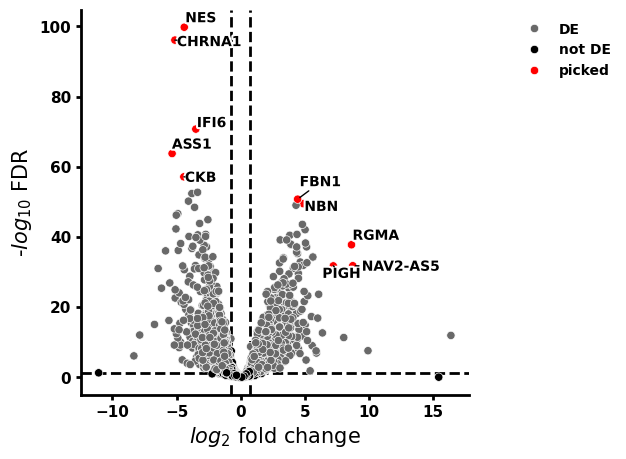

C:\Users\danie\OneDrive - University of Florida\Documents\UF Semesters\SEMESTERS\Fall 2025\CIS 4144\4144_Bioinformatics_Project\venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\danie\OneDrive - University of Florida\Documents\UF Semesters\SEMESTERS\Fall 2025\CIS 4144\4144_Bioinformatics_Project\venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
Running Wald tests...
... done in 2.48 seconds.



Log2 fold change & Wald test p-value: condition t0 vs t48
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Gene                                                                       
ENSG00000000003  35.012368       -1.823466  0.435142 -4.190506  0.000028   
ENSG00000000005   0.000979        0.099019  4.735043  0.020912  0.983316   
ENSG00000000419  23.293440       -0.593642  0.300809 -1.973486  0.048440   
ENSG00000000457  22.110150        0.597687  0.335338  1.782342  0.074694   
ENSG00000000460  11.645426        0.284990  0.645199  0.441710  0.658699   
...                    ...             ...       ...       ...       ...   
ENSG00000286268   0.080639        0.023049  1.700425  0.013555  0.989185   
ENSG00000286269   4.181108       -1.085382  0.252004 -4.307000  0.000017   
ENSG00000286270   0.002937        0.075679  4.734809  0.015984  0.987248   
ENSG00000286271   0.040833        0.174302  2.753342  0.063306  0.949523   
ENSG00000286272   0.086761    

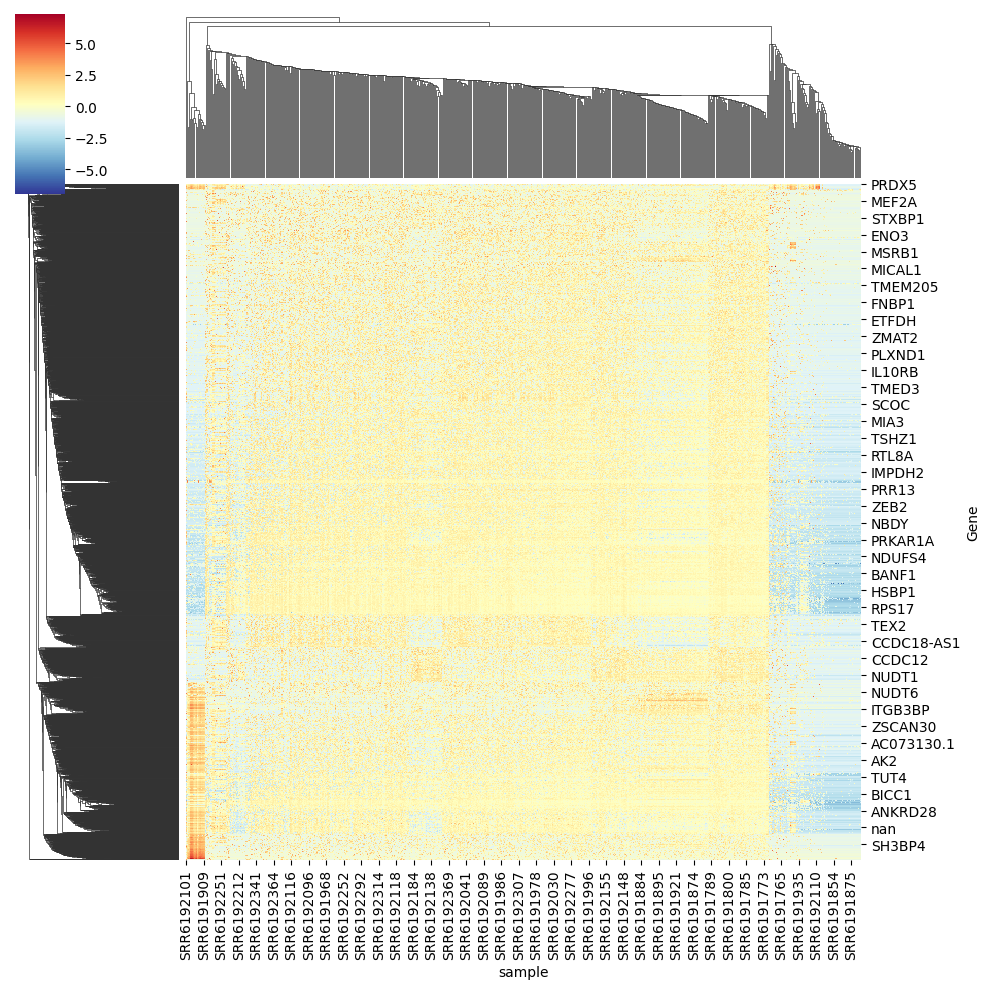

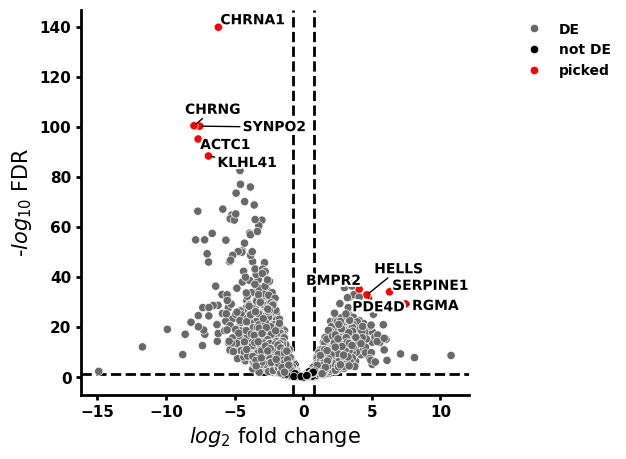

C:\Users\danie\OneDrive - University of Florida\Documents\UF Semesters\SEMESTERS\Fall 2025\CIS 4144\4144_Bioinformatics_Project\venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\danie\OneDrive - University of Florida\Documents\UF Semesters\SEMESTERS\Fall 2025\CIS 4144\4144_Bioinformatics_Project\venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
Running Wald tests...
... done in 2.66 seconds.



Log2 fold change & Wald test p-value: condition t0 vs t72
                  baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Gene                                                                           
ENSG00000000003  35.012368       -3.129489  0.432727 -7.232017  4.758738e-13   
ENSG00000000005   0.000979       -0.100770  4.719605 -0.021351  9.829654e-01   
ENSG00000000419  23.293440       -1.016092  0.299807 -3.389151  7.010946e-04   
ENSG00000000457  22.110150       -0.060755  0.333918 -0.181947  8.556244e-01   
ENSG00000000460  11.645426        0.492290  0.643513  0.765004  4.442692e-01   
...                    ...             ...       ...       ...           ...   
ENSG00000286268   0.080639       -0.490371  1.693889 -0.289494  7.722034e-01   
ENSG00000286269   4.181108       -0.944288  0.252248 -3.743485  1.814852e-04   
ENSG00000286270   0.002937       -0.100771  4.719605 -0.021352  9.829652e-01   
ENSG00000286271   0.040833        0.205565  2.750351  0.074742

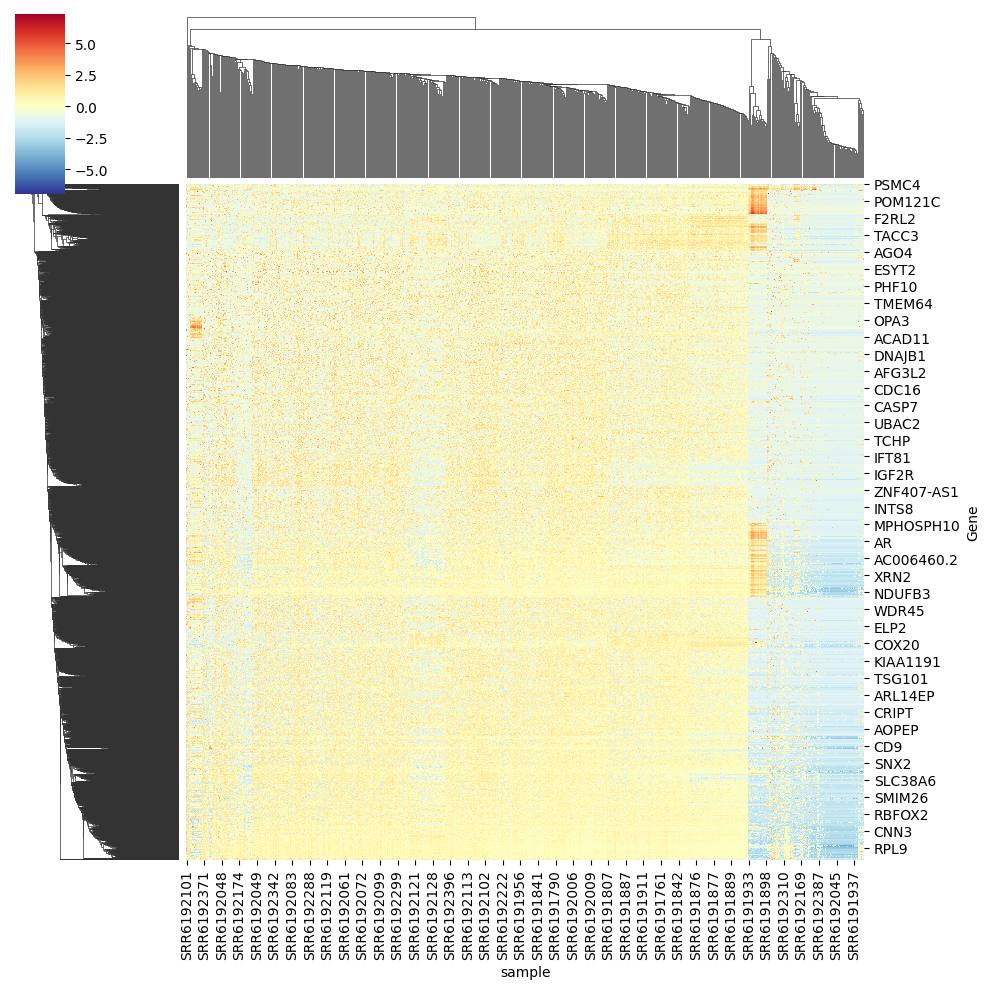

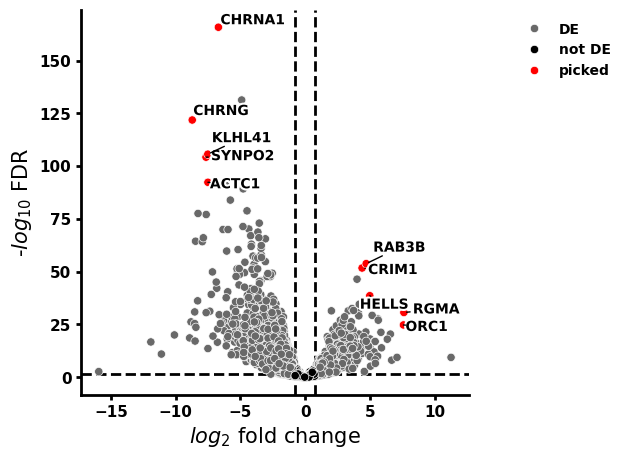

C:\Users\danie\OneDrive - University of Florida\Documents\UF Semesters\SEMESTERS\Fall 2025\CIS 4144\4144_Bioinformatics_Project\venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\danie\OneDrive - University of Florida\Documents\UF Semesters\SEMESTERS\Fall 2025\CIS 4144\4144_Bioinformatics_Project\venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
Running Wald tests...


In [ ]:
from itertools  import combinations
from sanbomics.tools import id_map
from sanbomics.plots import volcano

import seaborn as sns

groups = ["t0", "t24", "t48", "t72"]
comb = combinations(groups, 2)

mapper = id_map(species = 'human')

volcano_plots = []
heatmaps = []

dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

for combo in comb:
    g1, g2 = combo
    stat_res = DeseqStats(dds, n_cpus=1, contrast= ("condition", g1, g2))
    print(stat_res.summary())
    
    res = stat_res.results_df
    res['symbol'] = res.index.map(mapper.mapper)
    res = res[res.baseMean >= 10]
    
    sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]

    # VOLCANO
    volcano_plots.append(volcano(res, symbol='symbol', save=f'volcano_{g1}_{g2}', colors= ['dimgrey', 'black', 'red']))
    
    sorted_sigs = sigs.sort_values(by="padj", ascending=True)
    sorted_sigs.to_csv(f'sig_genes_{g1}_{g2}.csv', index=False)

    top50_genes = sorted_sigs.head(50)
    top50_genes.to_csv(f'top50_genes_{g1}_{g2}.csv', index=False)

    # HEATMAP
    dds_sigs = dds[:, sigs.index]
    grapher = pd.DataFrame(dds_sigs.layers['log1p'].T, index=dds_sigs.var_names, columns=dds_sigs.obs_names)
    grapher.index = grapher.index.map(mapper.mapper)

    heatmap = sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')
    heatmaps.append(heatmap)

    heatmap.savefig(f"heatmap_{g1}_{g2}.png")

In [18]:
stat_res = DeseqStats(dds, n_cpus=1, contrast= ("condition", "t72", "t0"))

In [19]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition t72 vs t0
                  baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Gene                                                                           
ENSG00000000003  35.012368        3.129489  0.432727  7.232017  4.758738e-13   
ENSG00000000005   0.000979        0.100770  4.719605  0.021351  9.829654e-01   
ENSG00000000419  23.293440        1.016092  0.299807  3.389151  7.010946e-04   
ENSG00000000457  22.110150        0.060755  0.333918  0.181947  8.556244e-01   
ENSG00000000460  11.645426       -0.492290  0.643513 -0.765004  4.442692e-01   
...                    ...             ...       ...       ...           ...   
ENSG00000286268   0.080639        0.490371  1.693889  0.289494  7.722034e-01   
ENSG00000286269   4.181108        0.944288  0.252248  3.743485  1.814852e-04   
ENSG00000286270   0.002937        0.100771  4.719605  0.021352  9.829652e-01   
ENSG00000286271   0.040833       -0.205565  2.750351 -0.074742

... done in 3.15 seconds.



In [20]:
stat_res24 = DeseqStats(dds, n_cpus=1, contrast= ("condition", "t72", "t24"))

In [21]:
stat_res24.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition t72 vs t24
                  baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Gene                                                                           
ENSG00000000003  35.012368        2.349982  0.349731  6.719402  1.824721e-11   
ENSG00000000005   0.000979        0.204014  3.850621  0.052982  9.577462e-01   
ENSG00000000419  23.293440        0.474094  0.242935  1.951524  5.099474e-02   
ENSG00000000457  22.110150        0.156842  0.272403  0.575770  5.647710e-01   
ENSG00000000460  11.645426       -0.043045  0.525834 -0.081860  9.347581e-01   
...                    ...             ...       ...       ...           ...   
ENSG00000286268   0.080639        0.789577  1.379880  0.572207  5.671816e-01   
ENSG00000286269   4.181108        1.186316  0.204019  5.814733  6.073092e-09   
ENSG00000286270   0.002937        0.145991  3.849967  0.037920  9.697514e-01   
ENSG00000286271   0.040833        0.158021  2.248156  0.07028

... done in 2.86 seconds.



In [22]:
stat_res48 = DeseqStats(dds, n_cpus=1, contrast= ("condition", "t72", "t48"))

In [23]:
stat_res48.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition t72 vs t48
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Gene                                                                       
ENSG00000000003  35.012368        1.306022  0.350719  3.723845  0.000196   
ENSG00000000005   0.000979        0.199789  3.873451  0.051579  0.958864   
ENSG00000000419  23.293440        0.422451  0.244348  1.728887  0.083829   
ENSG00000000457  22.110150        0.658442  0.274735  2.396641  0.016546   
ENSG00000000460  11.645426       -0.207300  0.528703 -0.392091  0.694991   
...                    ...             ...       ...       ...       ...   
ENSG00000286268   0.080639        0.513420  1.383356  0.371141  0.710532   
ENSG00000286269   4.181108       -0.141093  0.198654 -0.710245  0.477552   
ENSG00000286270   0.002937        0.176450  3.873164  0.045557  0.963663   
ENSG00000286271   0.040833       -0.031263  2.259156 -0.013838  0.988959   
ENSG00000286272   0.086761   

... done in 2.88 seconds.



In [25]:
res = stat_res.results_df
res24 = stat_res24.results_df
res48 = stat_res48.results_df

In [26]:
res

baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Gene                                                                           
ENSG00000000003  35.012368        3.129489  0.432727  7.232017  4.758738e-13   
ENSG00000000005   0.000979        0.100770  4.719605  0.021351  9.829654e-01   
ENSG00000000419  23.293440        1.016092  0.299807  3.389151  7.010946e-04   
ENSG00000000457  22.110150        0.060755  0.333918  0.181947  8.556244e-01   
ENSG00000000460  11.645426       -0.492290  0.643513 -0.765004  4.442692e-01   
...                    ...             ...       ...       ...           ...   
ENSG00000286268   0.080639        0.490371  1.693889  0.289494  7.722034e-01   
ENSG00000286269   4.181108        0.944288  0.252248  3.743485  1.814852e-04   
ENSG00000286270   0.002937        0.100771  4.719605  0.021352  9.829652e-01   
ENSG00000286271   0.040833       -0.205565  2.750351 -0.074742  9.404204e-01   
ENSG00000286272   0.086761       -0.365103  1.407269 -0.259441  7.952949e-01   

                         padj  
Gene                           
ENSG00000000003  8.094726e-12  
ENSG00000000005           NaN  
ENSG00000000419  2.423022e-03  
ENSG00000000457  8.954242e-01  
ENSG00000000460  5.475341e-01  
...                       ...  
ENSG00000286268           NaN  
ENSG00000286269  7.289209e-04  
ENSG00000286270           NaN  
ENSG00000286271           NaN  
ENSG00000286272           NaN  

[36505 rows x 6 columns]

In [27]:
res24

baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Gene                                                                           
ENSG00000000003  35.012368        2.349982  0.349731  6.719402  1.824721e-11   
ENSG00000000005   0.000979        0.204014  3.850621  0.052982  9.577462e-01   
ENSG00000000419  23.293440        0.474094  0.242935  1.951524  5.099474e-02   
ENSG00000000457  22.110150        0.156842  0.272403  0.575770  5.647710e-01   
ENSG00000000460  11.645426       -0.043045  0.525834 -0.081860  9.347581e-01   
...                    ...             ...       ...       ...           ...   
ENSG00000286268   0.080639        0.789577  1.379880  0.572207  5.671816e-01   
ENSG00000286269   4.181108        1.186316  0.204019  5.814733  6.073092e-09   
ENSG00000286270   0.002937        0.145991  3.849967  0.037920  9.697514e-01   
ENSG00000286271   0.040833        0.158021  2.248156  0.070289  9.439636e-01   
ENSG00000286272   0.086761        0.442092  1.158850  0.381492  7.028385e-01   

                         padj  
Gene                           
ENSG00000000003  5.496738e-10  
ENSG00000000005           NaN  
ENSG00000000419  1.053671e-01  
ENSG00000000457  6.755519e-01  
ENSG00000000460  9.563596e-01  
...                       ...  
ENSG00000286268           NaN  
ENSG00000286269  1.088686e-07  
ENSG00000286270           NaN  
ENSG00000286271           NaN  
ENSG00000286272           NaN  

[36505 rows x 6 columns]

In [28]:
res48

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Gene                                                                       
ENSG00000000003  35.012368        1.306022  0.350719  3.723845  0.000196   
ENSG00000000005   0.000979        0.199789  3.873451  0.051579  0.958864   
ENSG00000000419  23.293440        0.422451  0.244348  1.728887  0.083829   
ENSG00000000457  22.110150        0.658442  0.274735  2.396641  0.016546   
ENSG00000000460  11.645426       -0.207300  0.528703 -0.392091  0.694991   
...                    ...             ...       ...       ...       ...   
ENSG00000286268   0.080639        0.513420  1.383356  0.371141  0.710532   
ENSG00000286269   4.181108       -0.141093  0.198654 -0.710245  0.477552   
ENSG00000286270   0.002937        0.176450  3.873164  0.045557  0.963663   
ENSG00000286271   0.040833       -0.031263  2.259156 -0.013838  0.988959   
ENSG00000286272   0.086761       -0.094153  1.155960 -0.081450  0.935084   

                     padj  
Gene                       
ENSG00000000003  0.006242  
ENSG00000000005       NaN  
ENSG00000000419  0.316148  
ENSG00000000457  0.123664  
ENSG00000000460  0.873522  
...                   ...  
ENSG00000286268       NaN  
ENSG00000286269  0.746449  
ENSG00000286270       NaN  
ENSG00000286271       NaN  
ENSG00000286272       NaN  

[36505 rows x 6 columns]

In [29]:
from sanbomics.tools import id_map

In [30]:
mapper = id_map(species = 'human')

In [31]:
res['symbol'] = res.index.map(mapper.mapper)
res24['symbol'] = res24.index.map(mapper.mapper)
res48['symbol'] = res48.index.map(mapper.mapper)

In [32]:
res

baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Gene                                                                           
ENSG00000000003  35.012368        3.129489  0.432727  7.232017  4.758738e-13   
ENSG00000000005   0.000979        0.100770  4.719605  0.021351  9.829654e-01   
ENSG00000000419  23.293440        1.016092  0.299807  3.389151  7.010946e-04   
ENSG00000000457  22.110150        0.060755  0.333918  0.181947  8.556244e-01   
ENSG00000000460  11.645426       -0.492290  0.643513 -0.765004  4.442692e-01   
...                    ...             ...       ...       ...           ...   
ENSG00000286268   0.080639        0.490371  1.693889  0.289494  7.722034e-01   
ENSG00000286269   4.181108        0.944288  0.252248  3.743485  1.814852e-04   
ENSG00000286270   0.002937        0.100771  4.719605  0.021352  9.829652e-01   
ENSG00000286271   0.040833       -0.205565  2.750351 -0.074742  9.404204e-01   
ENSG00000286272   0.086761       -0.365103  1.407269 -0.259441  7.952949e-01   

                         padj      symbol  
Gene                                       
ENSG00000000003  8.094726e-12      TSPAN6  
ENSG00000000005           NaN        TNMD  
ENSG00000000419  2.423022e-03        DPM1  
ENSG00000000457  8.954242e-01       SCYL3  
ENSG00000000460  5.475341e-01    C1orf112  
...                       ...         ...  
ENSG00000286268           NaN         NaN  
ENSG00000286269  7.289209e-04  AC092661.1  
ENSG00000286270           NaN  AL591074.2  
ENSG00000286271           NaN  AC008945.2  
ENSG00000286272           NaN  AC093843.2  

[36505 rows x 7 columns]

In [34]:
res = res[res.baseMean >= 10]
res24 = res24[res24.baseMean >= 10]
res48 = res48[res48.baseMean >= 10]

In [35]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]
sigs24 = res24[(res24.padj < 0.05) & (abs(res24.log2FoldChange) > 0.5)]
sigs48 = res48[(res48.padj < 0.05) & (abs(res48.log2FoldChange) > 0.5)]

In [36]:
sigs

baseMean  log2FoldChange     lfcSE       stat  \
Gene                                                               
ENSG00000000003   35.012368        3.129489  0.432727   7.232017   
ENSG00000000419   23.293440        1.016092  0.299807   3.389151   
ENSG00000000971  186.032932        3.360344  0.288794  11.635786   
ENSG00000001461   34.097906       -1.521084  0.335674  -4.531437   
ENSG00000001629   55.581819        1.457345  0.341047   4.273150   
...                     ...             ...       ...        ...   
ENSG00000286070   24.087823        0.540342  0.217605   2.483134   
ENSG00000286071   11.916429        2.010063  0.367109   5.475380   
ENSG00000286147   70.405958       -0.547006  0.170882  -3.201067   
ENSG00000286169   14.891288        1.745067  0.484370   3.602759   
ENSG00000286223   15.485849       -1.868814  0.575169  -3.249154   

                       pvalue          padj      symbol  
Gene                                                     
ENSG00000000003  4.758738e-13  8.094726e-12      TSPAN6  
ENSG00000000419  7.010946e-04  2.423022e-03        DPM1  
ENSG00000000971  2.710818e-31  2.806778e-29         CFH  
ENSG00000001461  5.858389e-06  3.263103e-05      NIPAL3  
ENSG00000001629  1.927311e-05  9.589396e-05      ANKIB1  
...                       ...           ...         ...  
ENSG00000286070  1.302323e-02  3.067164e-02        GGT1  
ENSG00000286071  4.365725e-08  3.610012e-07  AL136171.2  
ENSG00000286147  1.369198e-03  4.368232e-03  AC092445.1  
ENSG00000286169  3.148569e-04  1.193853e-03         NaN  
ENSG00000286223  1.157486e-03  3.769032e-03  AC064836.4  

[4666 rows x 7 columns]

In [37]:
sigs24

baseMean  log2FoldChange     lfcSE       stat  \
Gene                                                               
ENSG00000000003   35.012368        2.349982  0.349731   6.719402   
ENSG00000000971  186.032932        2.386991  0.234198  10.192171   
ENSG00000001036   37.762183       -1.236312  0.236319  -5.231542   
ENSG00000001461   34.097906       -0.810461  0.274921  -2.947981   
ENSG00000001629   55.581819        1.024327  0.277362   3.693109   
...                     ...             ...       ...        ...   
ENSG00000285612   23.797306        2.812365  0.602113   4.670828   
ENSG00000285756   10.301255        1.225989  0.272365   4.501266   
ENSG00000285967   12.113678        1.402850  0.201791   6.951999   
ENSG00000286125   17.652233        1.092435  0.162670   6.715667   
ENSG00000286147   70.405958        0.624678  0.140374   4.450092   

                       pvalue          padj      symbol  
Gene                                                     
ENSG00000000003  1.824721e-11  5.496738e-10      TSPAN6  
ENSG00000000971  2.149105e-24  4.709764e-22         CFH  
ENSG00000001036  1.681022e-07  2.141837e-06       FUCA2  
ENSG00000001461  3.198568e-03  1.092400e-02      NIPAL3  
ENSG00000001629  2.215288e-04  1.153544e-03      ANKIB1  
...                       ...           ...         ...  
ENSG00000285612  2.999877e-06  2.719434e-05  AC004974.1  
ENSG00000285756  6.754990e-06  5.570484e-05  BX890604.2  
ENSG00000285967  3.601465e-12  1.247844e-10    NIPBL-DT  
ENSG00000286125  1.872079e-11  5.629723e-10  AC006115.2  
ENSG00000286147  8.583333e-06  6.865100e-05  AC092445.1  

[3686 rows x 7 columns]

In [38]:
sigs48

baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Gene                                                                            
ENSG00000000003   35.012368        1.306022  0.350719  3.723845  1.962117e-04   
ENSG00000000971  186.032932        0.916908  0.235077  3.900463  9.600885e-05   
ENSG00000001167   12.405960       -1.151990  0.397976 -2.894623  3.796139e-03   
ENSG00000002549   65.979054        0.861278  0.224664  3.833634  1.262641e-04   
ENSG00000002586  245.535474       -1.176036  0.151483 -7.763502  8.261578e-15   
...                     ...             ...       ...       ...           ...   
ENSG00000281383   18.045249       -0.513863  0.133317 -3.854436  1.159965e-04   
ENSG00000281392   21.078809       -0.620708  0.188687 -3.289616  1.003244e-03   
ENSG00000284052   14.241925       -0.629890  0.209377 -3.008404  2.626236e-03   
ENSG00000284624   11.457295       -0.731961  0.198974 -3.678673  2.344503e-04   
ENSG00000286070   24.087823        0.852819  0.178481  4.778195  1.768757e-06   

                         padj      symbol  
Gene                                       
ENSG00000000003  6.242401e-03      TSPAN6  
ENSG00000000971  3.608289e-03         CFH  
ENSG00000001167  4.768834e-02        NFYA  
ENSG00000002549  4.431519e-03        LAP3  
ENSG00000002586  1.021807e-11        CD99  
...                       ...         ...  
ENSG00000281383  4.186028e-03  FP671120.7  
ENSG00000281392  1.949061e-02  AC107204.1  
ENSG00000284052  3.694552e-02  AC006460.2  
ENSG00000284624  6.979641e-03  AC092902.4  
ENSG00000286070  1.694644e-04        GGT1  

[798 rows x 7 columns]

In [40]:
from sanbomics.plots import volcano

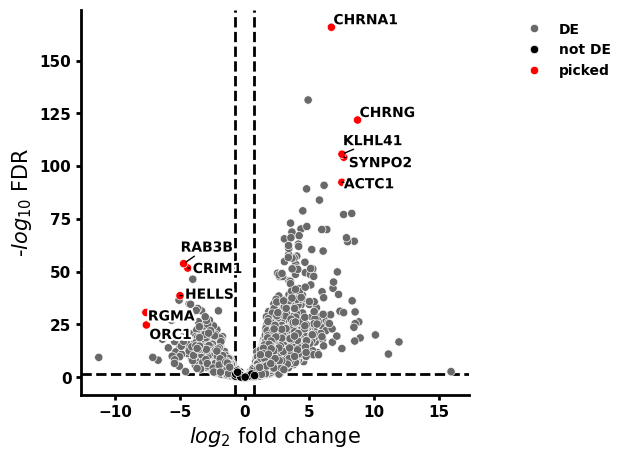

In [42]:
volcano(res, symbol='symbol', colors= ['dimgrey', 'black', 'red'])

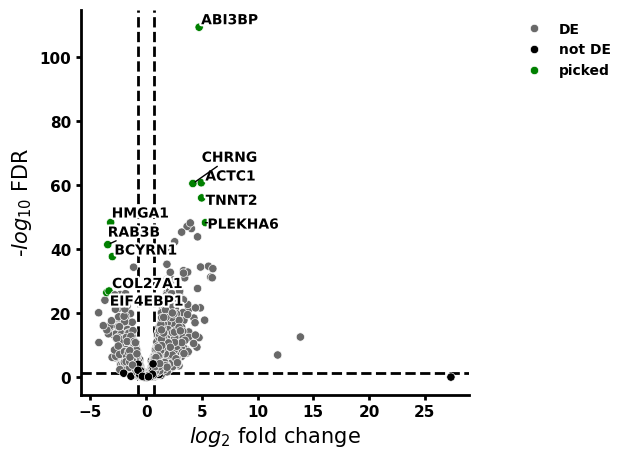

In [43]:
volcano(res24, symbol='symbol', colors= ['dimgrey', 'black', 'green'])

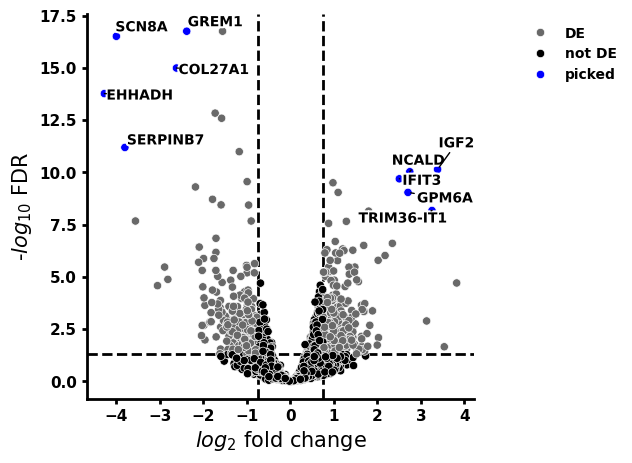

In [44]:
volcano(res48, symbol='symbol', colors= ['dimgrey', 'black', 'blue'])

In [47]:
sorted_sigs = sigs.sort_values(by="padj", ascending=True)
sorted_sigs24 = sigs24.sort_values(by="padj", ascending=True)
sorted_sigs48 = sigs48.sort_values(by="padj", ascending=True)

In [52]:
sorted_sigs.to_csv('sig_genes_t0_t72.csv', index=False)
sorted_sigs24.to_csv('sig_genes_t24_t72.csv', index=False)
sorted_sigs48.to_csv('sig_genes_t48_t72.csv', index=False)

In [46]:
sorted_sigs

baseMean  log2FoldChange     lfcSE       stat  \
Gene                                                               
ENSG00000138435  567.853949        6.698320  0.240427  27.860134   
ENSG00000170581  319.234379        4.900853  0.197430  24.823205   
ENSG00000196811   80.919455        8.719529  0.364641  23.912665   
ENSG00000239474  167.852490        7.514334  0.337129  22.289214   
ENSG00000172403  284.501594        7.655500  0.345899  22.132187   
...                     ...             ...       ...        ...   
ENSG00000164087   10.824254       -1.592242  0.699876  -2.275035   
ENSG00000119682   15.111508        1.013891  0.445954   2.273534   
ENSG00000143319   12.800888       -0.800920  0.352415  -2.272664   
ENSG00000214548   17.985573        1.457639  0.641852   2.270990   
ENSG00000099901   22.816714       -0.566595  0.249579  -2.270205   

                        pvalue           padj   symbol  
Gene                                                    
ENSG00000138435  8.119317e-171  1.370297e-166   CHRNA1  
ENSG00000170581  5.036078e-136  4.249694e-132    STAT2  
ENSG00000196811  2.261479e-126  1.272232e-122    CHRNG  
ENSG00000239474  4.701716e-110  1.983772e-106   KLHL41  
ENSG00000172403  1.548822e-108  5.227894e-105   SYNPO2  
...                        ...            ...      ...  
ENSG00000164087   2.290382e-02   4.944663e-02    POC1A  
ENSG00000119682   2.299404e-02   4.958098e-02    AREL1  
ENSG00000143319   2.304646e-02   4.968133e-02  ISG20L2  
ENSG00000214548   2.314758e-02   4.984241e-02     MEG3  
ENSG00000099901   2.319514e-02   4.991894e-02   RANBP1  

[4666 rows x 7 columns]

In [48]:
top50_genes = sorted_sigs.head(50)
top50_genes24 = sorted_sigs24.head(50)
top50_genes48 = sorted_sigs48.head(50)

In [51]:
top50_genes.to_csv('top50_genes_t0_t72.csv', index=False)
top50_genes24.to_csv('top50_genes_t24_t72.csv', index=False)
top50_genes48.to_csv('top50_genes_t48_t72.csv', index=False)

In [35]:
# HEATMAP

In [54]:
dds_sigs = dds[:, sigs.index]
dds_sigs24 = dds[:, sigs24.index]
dds_sigs48 = dds[:, sigs48.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 656 × 4666
    obs: 'condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'

In [56]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [57]:
dds.layers['log1p']

array([[3.86660864, 0.        , 3.79410932, ..., 0.        , 0.        ,
        0.        ],
       [4.4314115 , 0.        , 4.28470545, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 5.87539481, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [6.22787792, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 4.85063614, ..., 0.        , 0.        ,
        0.        ],
       [0.7025255 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(656, 36505))

In [58]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T, index=dds_sigs.var_names, columns=dds_sigs.obs_names)
grapher24 = pd.DataFrame(dds_sigs24.layers['log1p'].T, index=dds_sigs24.var_names, columns=dds_sigs24.obs_names)
grapher48 = pd.DataFrame(dds_sigs48.layers['log1p'].T, index=dds_sigs48.var_names, columns=dds_sigs48.obs_names)

In [59]:
import seaborn as sns

In [60]:
grapher.index = grapher.index.map(mapper.mapper)
grapher24.index = grapher24.index.map(mapper.mapper)
grapher48.index = grapher48.index.map(mapper.mapper)

C:\Users\danie\OneDrive - University of Florida\Documents\UF Semesters\SEMESTERS\Fall 2025\CIS 4144\4144_Bioinformatics_Project\venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\danie\OneDrive - University of Florida\Documents\UF Semesters\SEMESTERS\Fall 2025\CIS 4144\4144_Bioinformatics_Project\venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


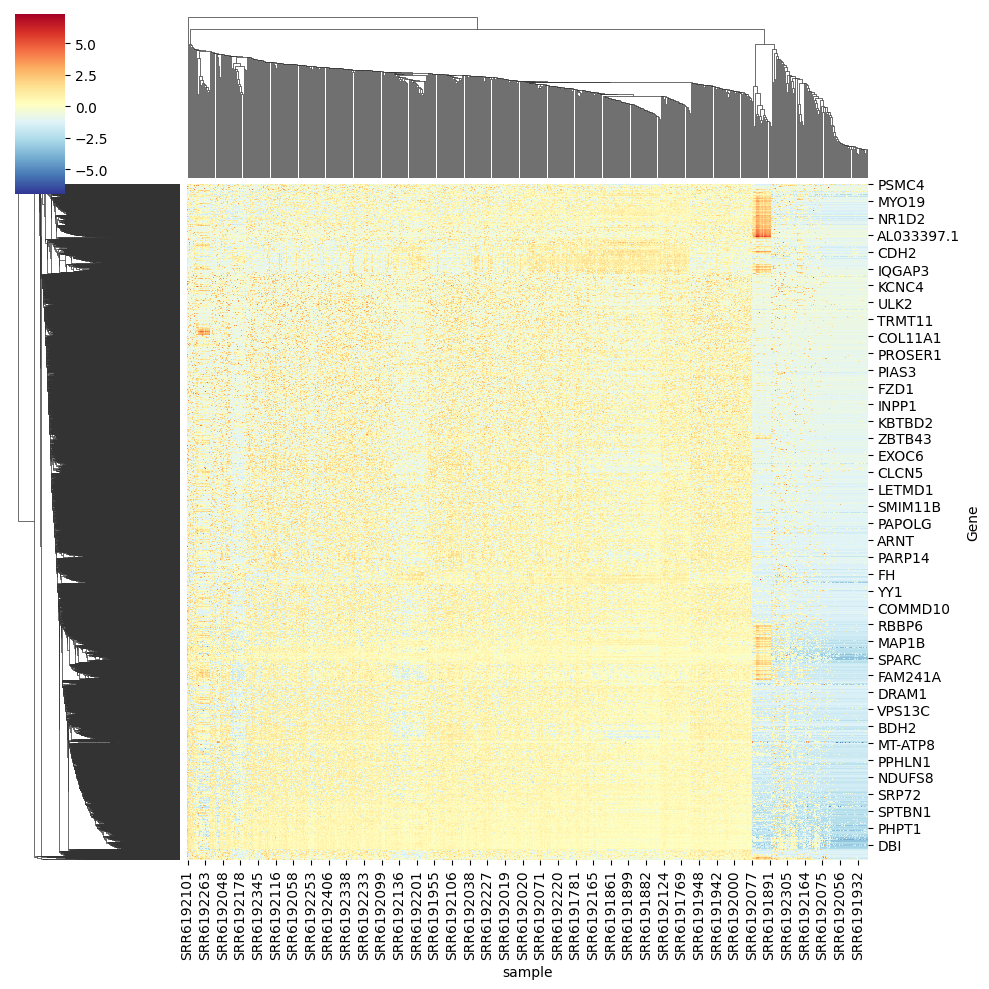

In [61]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

C:\Users\danie\OneDrive - University of Florida\Documents\UF Semesters\SEMESTERS\Fall 2025\CIS 4144\4144_Bioinformatics_Project\venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\danie\OneDrive - University of Florida\Documents\UF Semesters\SEMESTERS\Fall 2025\CIS 4144\4144_Bioinformatics_Project\venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


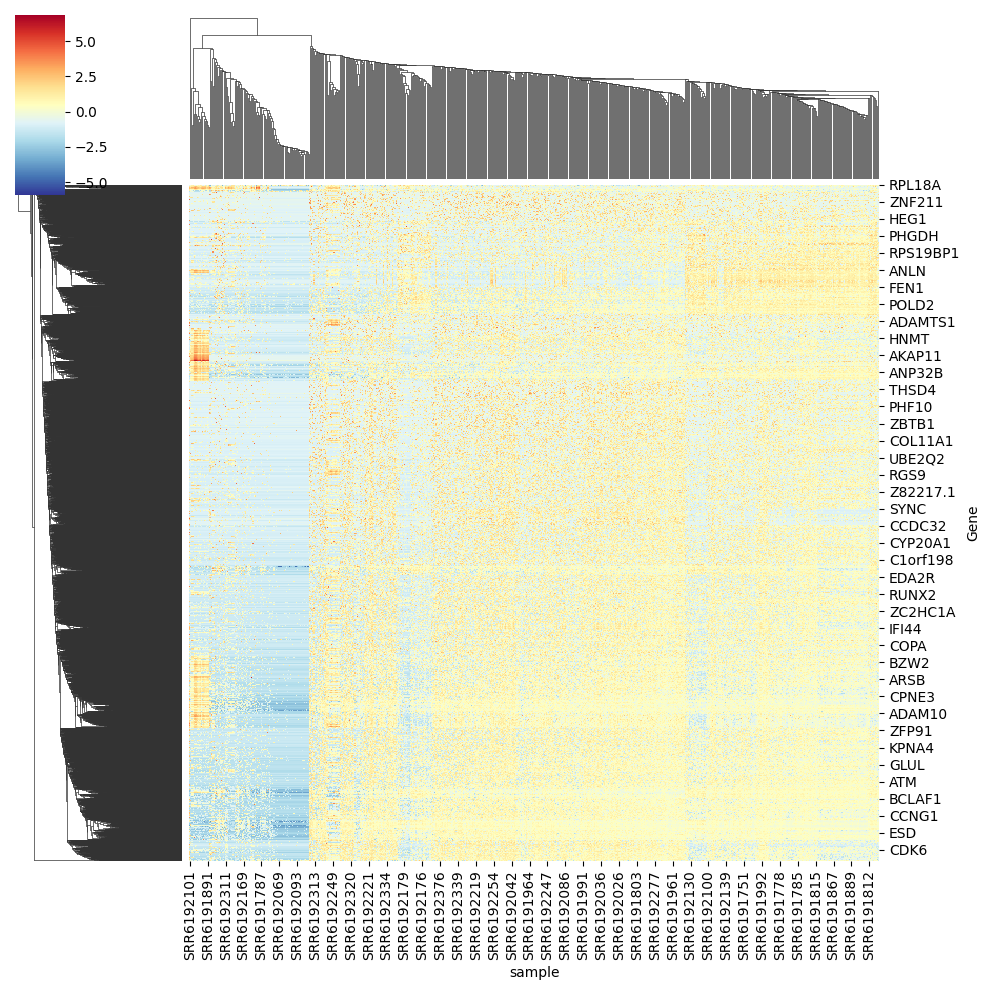

In [62]:
sns.clustermap(grapher24, z_score=0, cmap = 'RdYlBu_r')

C:\Users\danie\OneDrive - University of Florida\Documents\UF Semesters\SEMESTERS\Fall 2025\CIS 4144\4144_Bioinformatics_Project\venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\danie\OneDrive - University of Florida\Documents\UF Semesters\SEMESTERS\Fall 2025\CIS 4144\4144_Bioinformatics_Project\venv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


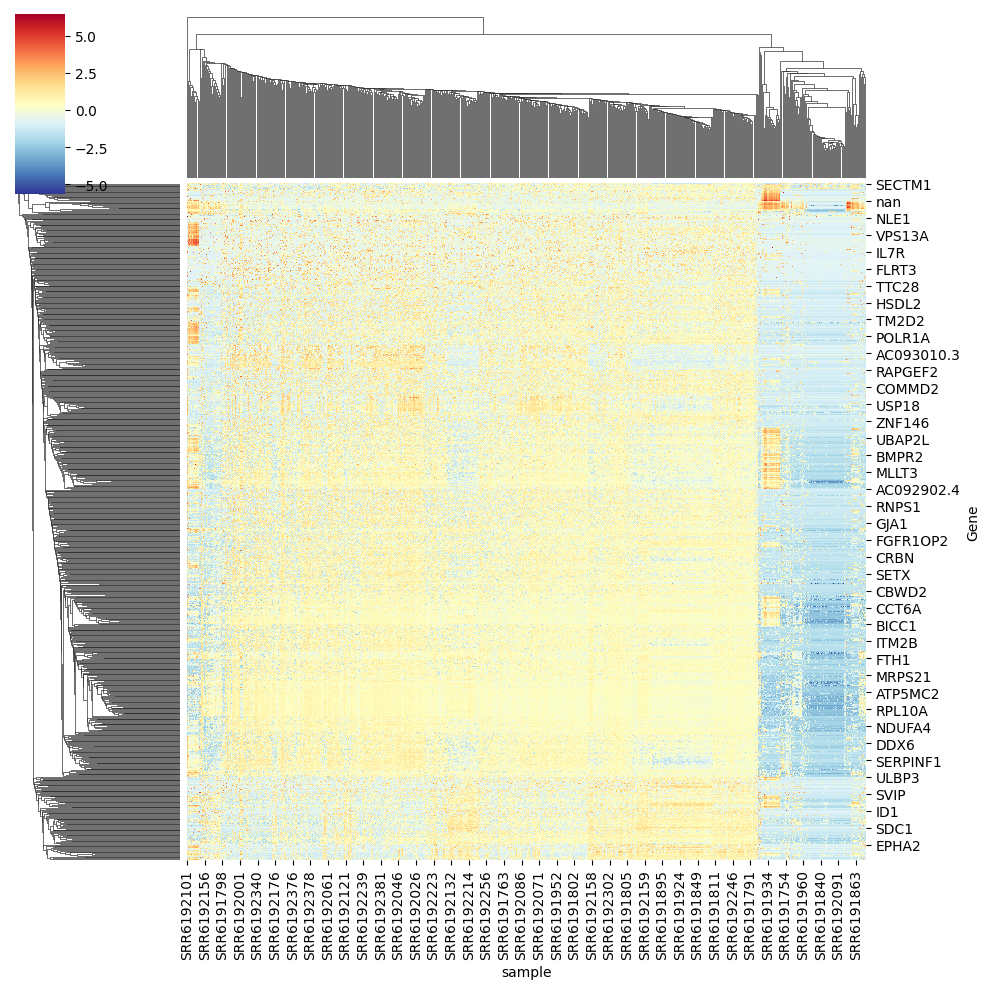

In [63]:
sns.clustermap(grapher48, z_score=0, cmap = 'RdYlBu_r')

In [45]:
sigs

baseMean  log2FoldChange     lfcSE       stat  \
Gene                                                               
ENSG00000000003   35.012368        3.129489  0.432727   7.232017   
ENSG00000000419   23.293440        1.016092  0.299807   3.389151   
ENSG00000000971  186.032932        3.360344  0.288794  11.635786   
ENSG00000001461   34.097906       -1.521084  0.335674  -4.531437   
ENSG00000001629   55.581819        1.457345  0.341047   4.273150   
...                     ...             ...       ...        ...   
ENSG00000286070   24.087823        0.540342  0.217605   2.483134   
ENSG00000286071   11.916429        2.010063  0.367109   5.475380   
ENSG00000286147   70.405958       -0.547006  0.170882  -3.201067   
ENSG00000286169   14.891288        1.745067  0.484370   3.602759   
ENSG00000286223   15.485849       -1.868814  0.575169  -3.249154   

                       pvalue          padj      symbol  
Gene                                                     
ENSG00000000003  4.758738e-13  8.094726e-12      TSPAN6  
ENSG00000000419  7.010946e-04  2.423022e-03        DPM1  
ENSG00000000971  2.710818e-31  2.806778e-29         CFH  
ENSG00000001461  5.858389e-06  3.263103e-05      NIPAL3  
ENSG00000001629  1.927311e-05  9.589396e-05      ANKIB1  
...                       ...           ...         ...  
ENSG00000286070  1.302323e-02  3.067164e-02        GGT1  
ENSG00000286071  4.365725e-08  3.610012e-07  AL136171.2  
ENSG00000286147  1.369198e-03  4.368232e-03  AC092445.1  
ENSG00000286169  3.148569e-04  1.193853e-03         NaN  
ENSG00000286223  1.157486e-03  3.769032e-03  AC064836.4  

[4666 rows x 7 columns]

In [46]:
res

baseMean  log2FoldChange     lfcSE       stat  \
Gene                                                               
ENSG00000000003   35.012368        3.129489  0.432727   7.232017   
ENSG00000000419   23.293440        1.016092  0.299807   3.389151   
ENSG00000000457   22.110150        0.060755  0.333918   0.181947   
ENSG00000000460   11.645426       -0.492290  0.643513  -0.765004   
ENSG00000000971  186.032932        3.360344  0.288794  11.635786   
...                     ...             ...       ...        ...   
ENSG00000286129   20.961065        0.431466  0.265711   1.623815   
ENSG00000286147   70.405958       -0.547006  0.170882  -3.201067   
ENSG00000286169   14.891288        1.745067  0.484370   3.602759   
ENSG00000286219   26.129510        0.768357  0.461015   1.666663   
ENSG00000286223   15.485849       -1.868814  0.575169  -3.249154   

                       pvalue          padj      symbol  
Gene                                                     
ENSG00000000003  4.758738e-13  8.094726e-12      TSPAN6  
ENSG00000000419  7.010946e-04  2.423022e-03        DPM1  
ENSG00000000457  8.556244e-01  8.954242e-01       SCYL3  
ENSG00000000460  4.442692e-01  5.475341e-01    C1orf112  
ENSG00000000971  2.710818e-31  2.806778e-29         CFH  
...                       ...           ...         ...  
ENSG00000286129  1.044153e-01  1.733101e-01         NaN  
ENSG00000286147  1.369198e-03  4.368232e-03  AC092445.1  
ENSG00000286169  3.148569e-04  1.193853e-03         NaN  
ENSG00000286219  9.558143e-02  1.615551e-01   NOTCH2NLC  
ENSG00000286223  1.157486e-03  3.769032e-03  AC064836.4  

[7422 rows x 7 columns]

In [64]:
res.to_csv('differential_expression_t72_t0.csv', index=False)
res24.to_csv('differential_expression_t72_t24.csv', index=False)
res48.to_csv('differential_expression_t72_t48.csv', index=False)